<a href="https://colab.research.google.com/github/breemo/ML/blob/main/AI_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task#1**:
Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sb


In [30]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [31]:
#Number of columns with data types of each column and null data if available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [32]:
# number of rows
len(df) #or
df.shape[0]

148654

In [33]:
print(df.isnull())

           Id  EmployeeName  JobTitle  BasePay  OvertimePay  OtherPay  \
0       False         False     False    False        False     False   
1       False         False     False    False        False     False   
2       False         False     False    False        False     False   
3       False         False     False    False        False     False   
4       False         False     False    False        False     False   
...       ...           ...       ...      ...          ...       ...   
148649  False         False     False    False        False     False   
148650  False         False     False     True         True      True   
148651  False         False     False     True         True      True   
148652  False         False     False     True         True      True   
148653  False         False     False    False        False     False   

        Benefits  TotalPay  TotalPayBenefits   Year  Notes  Agency  Status  
0           True     False             False  

In [34]:
#Number of null values for each column
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

#**Task#2:**
Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [35]:
#mean
def find_mean(salaries):
     sum_n = sum(salaries)
     len_n = len(salaries)
     mean = sum_n/len_n
     return mean

result = find_mean(df['TotalPay'])
#print(sum(df['TotalPay']))
print("mean is: ",result)


mean is:  74768.321971703


In [36]:
#OR
_mean = df["TotalPay"].mean()
print(_mean)

74768.32197169267


In [37]:
#median
def find_median(salaries):
    salaries.sort()
    length = len(salaries)
    length_is_odd = True if length % 2 == 0 else False
    if length_is_odd:
        index = length//2
        median = salaries[index]
    else:
        index_1 = length//2
        index_2 = index_1 + 1
        median = (salaries[index_1] + salaries[index_2]) / 2
    return median

listSalaries = df['TotalPay'].to_list()
_median = find_median(listSalaries)
print("Median is : " ,_median)



Median is :  71427.04


In [38]:
#OR
_median = df["TotalPay"].median()
print(_median)

71426.60999999999


In [39]:
#MODE
def calculate_mode(list_of_numbers):
    counter = {}
    for i in list_of_numbers:
        if i in counter:
            counter[i]+=1
        else:
            counter[i] = 1
    key_max = sorted(counter, key=counter.get, reverse=True)[:1][0]
    frequency = counter[key_max]
    return key_max, frequency

_mode = calculate_mode(df['TotalPay'])
print("MODE is : " ,_mode)


MODE is :  (0.0, 368)


In [40]:
#OR
_mode = df["TotalPay"].mode()
print(_mode)

0    0.0
Name: TotalPay, dtype: float64


In [41]:
#Min, Max Salary
_min = min(df['TotalPay'])
_max = max(df['TotalPay'])

print("min salary is : " ,_min)
print("max salary is : " ,_max)


min salary is :  -618.13
max salary is :  567595.43


In [42]:
#standard dviation
_sd = df["TotalPay"].std()
print(_sd)

50517.00527394987


#**Task #3**:
Data Cleaning: Handle missing data by suitable method with explain why you use it.


in data cleaning using the following approaches:
1- convert the null values into 0 (this what I used)
2- Drop unnecessary columns column (this what I used)
3-

In [43]:
# Load dataset
#df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [44]:
# Drop unnecessary columns column
to_drop_columns = ['Benefits',
            'Notes',
            'Status']
df = pd.read_csv('Salaries.csv')
df.drop(to_drop_columns, inplace=True, axis=1)

df.head()



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


In [45]:
#OR convert the null values into 0
df = pd.read_csv('Salaries.csv')
df.fillna(0, inplace=True)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,0.0,San Francisco,0.0
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,0.0,San Francisco,0.0
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,0.0,San Francisco,0.0
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,0.0,San Francisco,0.0
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,0.0,San Francisco,0.0


In [46]:
#Or remove extra characters
# df['Year'] = df['Year'].replace('0.*','',regex=True , inplace=True)
# df.head()

#Task #4:
Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

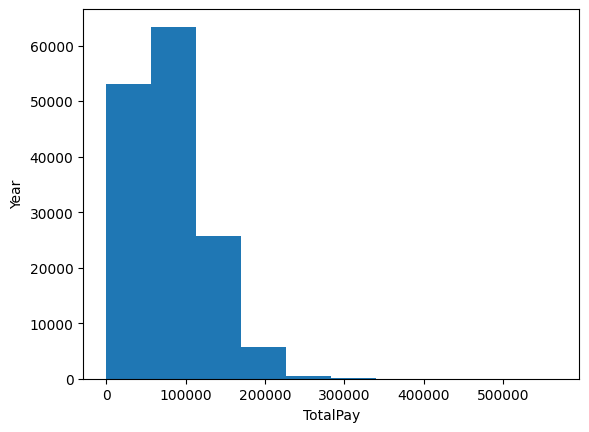

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,0.0,San Francisco,0.0
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,0.0,San Francisco,0.0
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,0.0,San Francisco,0.0
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,0.0,San Francisco,0.0
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,0.0,San Francisco,0.0


In [47]:
import matplotlib.pyplot as plt


plt.hist(df.TotalPay, bins=10)
plt.xlabel('TotalPay')
plt.ylabel('Year')
plt.show()

# def histograms(Data):
#     plt.hist(Data.TotalPay, bins = 10, color = 'orange', edgecolor = 'black')
#     plt.xlabel('TotalPay')
#     plt.ylabel('Year')
#     plt.show()

#histograms(df)

df.head()

#Task #5
**Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [48]:

groupedColumns = ["JobTitle","EmployeeName","BasePay","Year"]
result = df.groupby(groupedColumns).count()
print(result)

                                                  Id  OvertimePay  OtherPay  \
JobTitle           EmployeeName    BasePay  Year                              
ACCOUNT CLERK      ALICE BRONSON   43417.74 2011   1            1         1   
                   ALISHA WILLIS   11247.02 2011   1            1         1   
                   AMADO LUMAS JR  49777.81 2011   1            1         1   
                   ANA VILAR UY    49741.42 2011   1            1         1   
                   ANNA BOYD       49688.80 2011   1            1         1   
...                                               ..          ...       ...   
Youth Comm Advisor Mario R Yedidia 13915.80 2013   1            1         1   
                   Mario Yedidia   57544.73 2012   1            1         1   
                   Phimy  Truong   52433.88 2013   1            1         1   
                   Phimy Truong    32417.42 2014   1            1         1   
ZOO CURATOR        MYRON SULAK     43148.00 2011   1

#Task #6:
**Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [49]:
col1, col2 = "BasePay","TotalPay"
corr = df[col1].corr(df[col2])
print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  BasePay  and  TotalPay is:  0.95


#Task #7 (8)
**Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.